In [11]:
import pandas as pd 
jobs = pd.read_csv(r'C:\Users\carswje\OneDrive - HII\Documents\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-jobs-data.csv')
supply = pd.read_csv(r'C:\Users\carswje\OneDrive - HII\Documents\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-supply-data.csv')

C:\Users\carswje\AppData\Local\Temp\ipykernel_15668\909618943.py:2: DtypeWarning: Columns (3,4,20) have mixed types. Specify dtype option on import or set low_memory=False.
  jobs = pd.read_csv(r'C:\Users\carswje\OneDrive - HII\Documents\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-jobs-data.csv')


In [3]:
### Proprotions of frequencies table
jobs['apl'].value_counts(normalize = 'True').round(2) #Proportions using normalize 

#Takeaway: apl's have varying length. Primarily length 9, 11, or 8. 

apl_lengths = [len(s) for s in jobs['apl'].astype('string').dropna()]  #Table displays how often an apl has 8 characters, 9 characters, etc. 
df = pd.DataFrame({'length':apl_lengths}) 
table = df['length'].value_counts().reset_index()
table 

,length,count
0,9,30663
1,11,7803
2,8,4950
3,10,3227
4,5,368
5,4,251
6,7,2


In [4]:
#looking at components of location
sub = jobs[jobs['location'].str.count('-') == 3]
components = sub['location'].str.split("-", expand = True)
components = components.rename(columns = {0: 'Level', 1: 'Front to Back', 2: 'Distance from Center', 3: 'Purpose'})


# components['Level'].value_counts(normalize=True).round(2)
# components['Front to Back'].value_counts(normalize=True).round(2)
# components['Distance from Center'].value_counts(normalize=True).round(2)
# # components['Purpose'].value_counts(normalize=True).round(2)

Supply Data Exploration

In [5]:
supply['issue_date'] = pd.to_datetime(supply['issue_date'])   #Creating days_waiting variable that shows long the staff had to wait before receiving a part after requesting it. 
supply['demand_date'] = pd.to_datetime(supply['demand_date'])
supply['days_waiting'] = supply['issue_date'] - supply['demand_date']
supply['days_waiting'] = supply['days_waiting'].astype('string')
supply['days_waiting'] = supply['days_waiting'].str.split('d', n=1).str[0]
supply['days_waiting'] = supply['days_waiting'].dropna().astype('int64')

Matplotlib is building the font cache; this may take a moment.


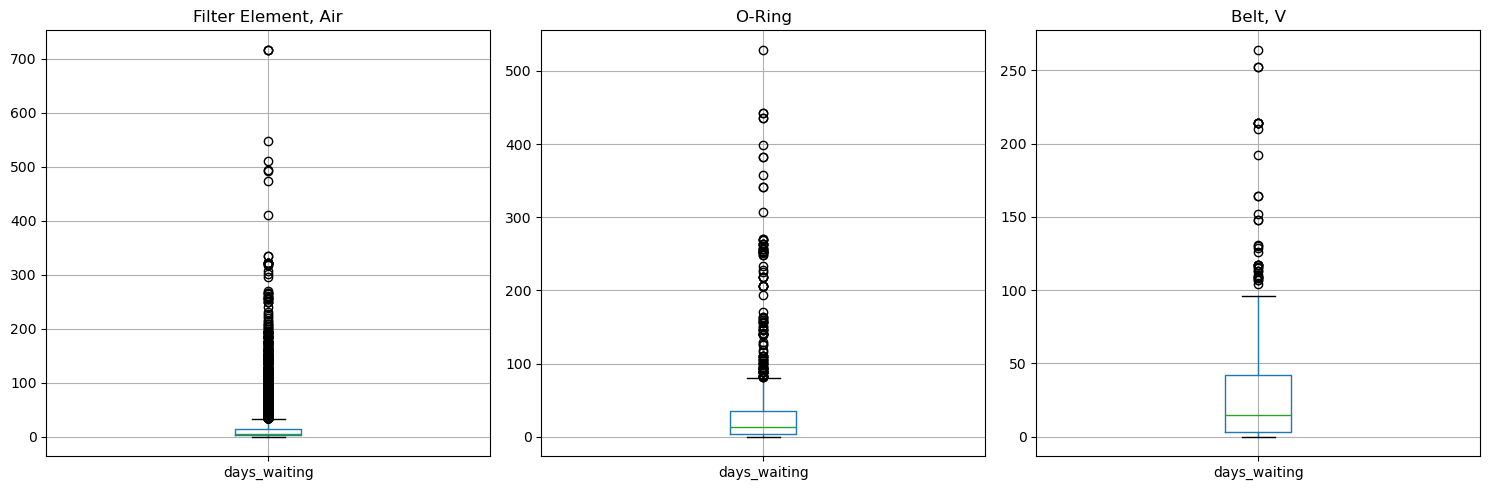

In [6]:
#Comparing the amount of days waited for different types of parts

supply['days_waiting'] = supply['days_waiting'].abs()  #Convert to absolute value. Assuming that negative values are due to dates being recorded in reverse. 

import matplotlib.pyplot as plt
supply['days_waiting'].describe().round(2) #mean 40 vs median 11

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

supply[supply['niin_nomenclature'] == 'FILTER ELEMENT,AIR'].boxplot(column ='days_waiting', ax=axs[0])  #11.5k records
axs[0].set_title('Filter Element, Air')

supply[supply['niin_nomenclature'] == 'O-RING'].boxplot(column ='days_waiting', ax=axs[1]) #1.2k records
axs[1].set_title('O-Ring')

supply[supply['niin_nomenclature'] == 'BELT,V'].boxplot(column ='days_waiting', ax=axs[2]) #900 records
axs[2].set_title('Belt, V')

plt.tight_layout()
plt.show()

#Goal: 
#Compare days waiting for different niin_nonenclatures to see if there is any meaningful differences.

#First, need days_waiting column to have no negative values. 

#Now, want to compare plots for these 3 most common niin_nomenclatures

# Unexpected Pattern in Hours Worked and Days Open
days_open has median 159, mean 320 <br>
Total hours worked has median 8, mean 34 <br> 
<br>
*Total hours worked is total_ship_force_man_hours + total_ima_man_hours

# Codes and their Corresponding Text Variables w # of NAs

cause_code                               | 0                        cause         | 0  <br> <br>
action_taken_code                        | 11233                   action_taken   | 0  <br> <br>
deferral_reason_code                     | 24                     deferral_reason | 24 <br> <br>
priority_code                            | 25                       priority      | 25  <br> <br>
tycom_screening_code                     | 9026                  tycom_screening  | 9031<br> <br>
type_availability_code                   | 25        type_of_availability_needed  | 25<br> <br>
status_code                              | 1                  component_status    | 1<br> <br>
when_discovered_code                     | 0                  when_discovered     | 2637<br> <br>

# Repeated # Of NAs [Due to the job being unfinished at the time of finalizing this dataset]

action_taken_code                        | 11233 <br> <br>
action_taken                             | 11830<br> <br>
date_closing                             | 11233<br> <br>
closing_ship_system                      | 11705<br> <br>
eswbs_closing                            | 11705<br> <br>

# A Note on eswbs_closing 

All but 23 records have the same eswbs_opening and eswbs_closing, excluding the records that are NA for eswbs_closing (job was never closed)
<br>

All but 23 records also have the same opening_ship_system and closing_ship_system. 

In [7]:
#Create a variable jobsOpen that tells how many jobs are currently being worked on on your ship
import pandas as pd
dat = pd.read_csv(r'C:\Users\carswje\OneDrive - HII\Documents\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-jobs-data.csv')

dat = dat.dropna(subset = ['date_closing'])
dat['date_maintenance_action'] = pd.to_datetime(dat['date_maintenance_action'])
dat['date_closing'] = pd.to_datetime(dat['date_closing'])

cvn68 = dat[dat['ship'] == 'CVN68']
cvn68 = cvn68.sort_values('date_maintenance_action').reset_index(drop =True)


cvn68['jobsOpen'] = 0 

for i in range(len(cvn68) - 1): #for each job
    for j in range(i): #for all j less than i
        if cvn68.loc[j, 'date_closing'] >  cvn68.loc[i, 'date_maintenance_action']:
            cvn68.loc[i, 'jobsOpen'] += 1

C:\Users\carswje\AppData\Local\Temp\ipykernel_15668\3322661065.py:3: DtypeWarning: Columns (3,4,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(r'C:\Users\carswje\OneDrive - HII\Documents\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-jobs-data.csv')


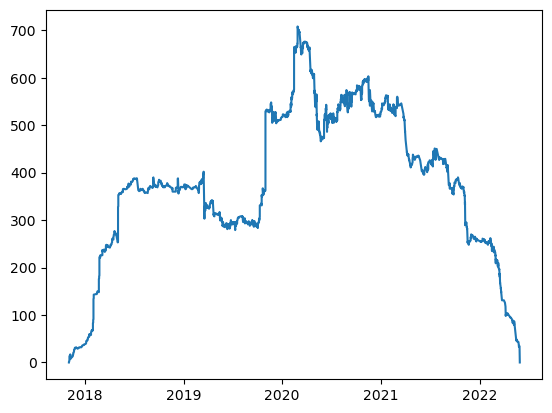

In [8]:
import matplotlib.pyplot as plt
plt.plot(cvn68['date_maintenance_action'],cvn68['jobsOpen'])

#Note:
#Need to consider ties. The loop looks at jobs by increasing date_maintenance_action. Depending on how ties are broken, Job A could have a different # of jobs open than job B because one was iterated through before the other

# The Connection Between Jobs and Supply

47350 rows in Jobs <br>
35194 rows in Supply <br>

Each row in Jobs has a unique job_seq <br>
Each row in Supply does not have a unique job_seq <br>
There are 14330 unique job_seq's in Supply <br> 

There are 47350 jobs. 14330 jobs having supply information. 33020 not having supply information. <br>

There are 33191 records in Jobs that do not have total_material_cost info.<br>




In [41]:
#look at job and supply material cost, etc. 

jobs_sub = jobs[['job_seq','total_material_cost']]
supply_sub = supply[['job_seq','total_price', 'unit_price','quantity']]



#now, I want to join on job_seq to compare these prices. Why? See what total_material_cost represents - is it the total cost of all part orders across all records for a job or is it 1 of the total_price values or something untracable? 

#next, want to work out the number of jobs, number of jobs with supply info, number of jobs without supply info.
#Knowing this will be useful for model buidling. If we have 47000 jobs and <10k have supply records, it may be more useful to ignore a lot of supply info for certain models 
#Trade off will be 47k records w no supply info vs 10k records w supply info (and we are not even sure how valuable this info would be)

full = pd.merge(jobs_sub, supply_sub, on = 'job_seq', how = 'right') 



Are there any job_seq in supply that are not in jobs? <br>
No. There are 47350 - 14330 = 33020 jobs with no supply info [47350 - 14330] and 33191 records with NA values for total_material_cost in Jobs


In [ ]:
engineered = full.groupby('job_seq')['total_price'].sum()
test = pd.merge(full, engineered, on = 'job_seq',how = 'left')

In [ ]:
#35194 supply records
#487 have incorrect total_material_cost
#157 have total_price errors

#Many of these errors occur with outlier values in unit_price, quantity, or both
#Even though there are only a few hundred errors, they could have a huge unwanted effect in modeling.
#Plan:
#Handle outliers in quantity and unit_price 
#Re-engineer total_price and total_material_cost with these cleaned quantity and unit_price columns

#We know that total_price is intended to = unit_price*quantity and total_material_cost is intended to = groupby(job_seq), sum(total_price) because 
#created these features (total_price and total_material_cost) manually. Then took the difference between these values and the actual values. Found that difference is often < .1 but not always (thus the reason for re-engineering)

# Observation on Dates

For 'Open' jobs, days_open assumes the closing of the job to be 10/9/2022. <br> <br>


'Open' and 'Overdue' jobs contain NA date_closing every single time <br>
<br>
47350 jobs, 3234 'Overdue', 7999 'Open', 36117 'Closed